# Case study on Supervised learning

# 1. Read the dataset to the python environment.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_excel('iris.xls')

In [3]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# 2. Do necessary pre-processing steps.

In [5]:
data.shape

(150, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
data.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# missing values

In [8]:
data.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

there is no null value

# Handle outliers

Text(0.5, 1.0, 'Boxplot of SL')

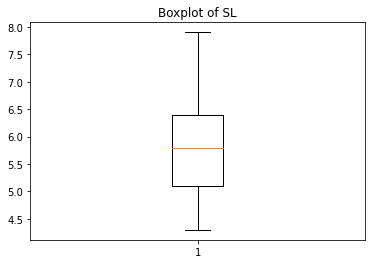

In [9]:
plt.boxplot(data['SL'])
plt.title("Boxplot of SL")  # there is no outliers present in SL

Text(0.5, 1.0, 'Boxplot of SW')

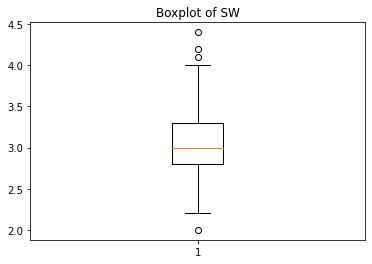

In [10]:
plt.boxplot(data['SW'])
plt.title("Boxplot of SW") # there are some outliers are present in SW

In [11]:
Q1 = np.percentile(data['SW'],25 ,interpolation = 'midpoint')
Q2 = np.percentile(data['SW'],50 ,interpolation = 'midpoint')
Q3 = np.percentile(data['SW'],75 ,interpolation = 'midpoint')

In [12]:
print("Q1:",Q1)
print("Q2:",Q2)
print("Q3:",Q3)

Q1: 2.8
Q2: 3.0
Q3: 3.3


In [13]:
data['SW'].median()

3.0

In [14]:
IQR = Q3-Q1

In [15]:
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print("lower limit:",low_lim)
print("upper limit:",up_lim)

lower limit: 2.05
upper limit: 4.05


In [16]:
outlier = []
for x in data['SW']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [17]:
ou

[4.4, 4.1, 4.2, 2.0]

In [18]:
ind1 = data['SW']>up_lim
data.loc[ind1].index

Int64Index([15, 32, 33], dtype='int64')

In [19]:
data.drop([15, 32, 33], inplace =True)

Text(0.5, 1.0, 'Boxplot of SW')

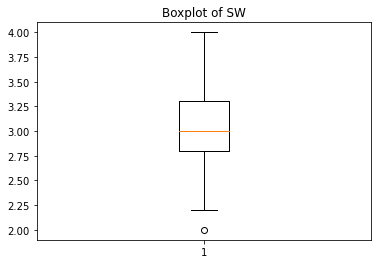

In [20]:
plt.boxplot(data['SW'])
plt.title("Boxplot of SW") # now there is no ouliers

Text(0.5, 1.0, 'Boxplot of PL')

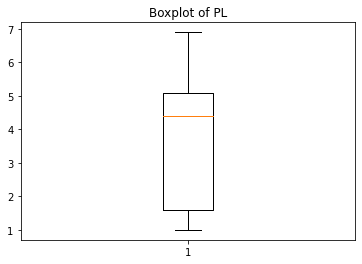

In [21]:
plt.boxplot(data['PL'])
plt.title("Boxplot of PL")  # there is no outliers present in it

Text(0.5, 1.0, 'Boxplot of PW')

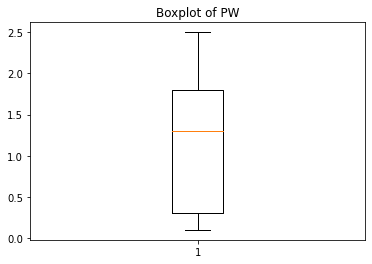

In [22]:
plt.boxplot(data['PW'])
plt.title("Boxplot of PW") # there is no outliers present in it

# min max scaling

In [23]:
data.describe()

,SL,SW,PL,PW
count,147.000000,147.000000,147.000000,147.000000
mean,5.851020,3.029932,3.805442,1.218367
std,0.834231,0.402971,1.751273,0.757973
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.000000,6.900000,2.500000


<AxesSubplot:>

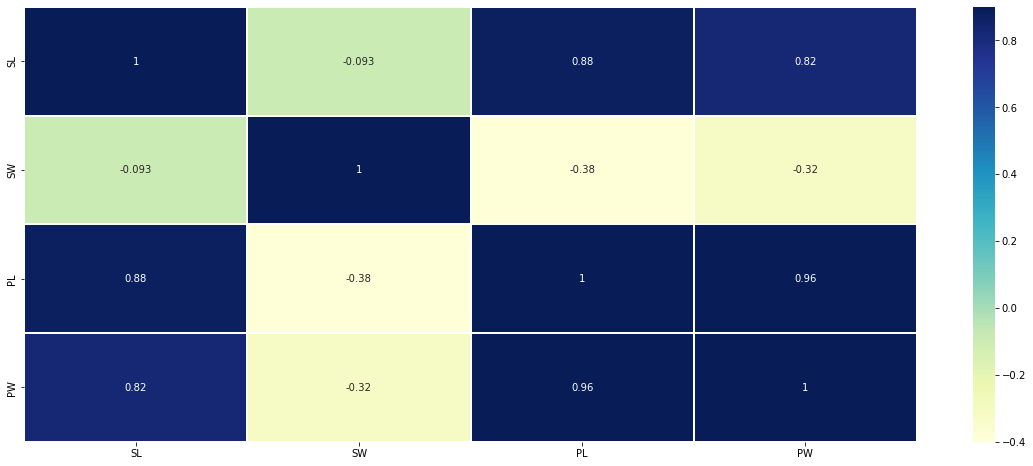

In [24]:
corrmatrix = data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix, vmin=-0.4, vmax=0.9, annot=True, linewidths=0.2, cmap='YlGnBu')

In [25]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [26]:
x = data.drop('Classification', axis=1)

In [27]:
x.describe()

,SL,SW,PL,PW
count,147.000000,147.000000,147.000000,147.000000
mean,5.851020,3.029932,3.805442,1.218367
std,0.834231,0.402971,1.751273,0.757973
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.000000,6.900000,2.500000


In [28]:
from sklearn import preprocessing
min_max = preprocessing.MinMaxScaler(feature_range=(0,1))
x = min_max.fit_transform(x)

In [29]:
x = pd.DataFrame(x)

In [30]:
x.describe()

,0,1,2,3
count,147.000000,147.000000,147.000000,147.000000
mean,0.430839,0.514966,0.475499,0.465986
std,0.231731,0.201485,0.296826,0.315822
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.400000,0.101695,0.083333
50%,0.416667,0.500000,0.576271,0.500000
75%,0.583333,0.650000,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [31]:
data = data.replace(['Iris-versicolor','Iris-virginica','Iris-setosa'],[0, 1, 2])
y = data['Classification']
x = data.drop('Classification', axis=1)

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x ,y, random_state=35, test_size=0.2)
from sklearn import linear_model
lr = linear_model.LinearRegression()
lr = linear_model.LinearRegression()
model = lr.fit(x_train, y_train)
predictions = model.predict(x_test)
from sklearn.metrics import mean_squared_error
print('MSE is: ',mean_squared_error(y_test,predictions))
from sklearn.metrics import r2_score
print('R squared value is: ',r2_score(y_test, predictions))

MSE is:  0.3597833154963997
R squared value is:  0.48520670278734546


# Standard scaling

In [33]:
from sklearn import preprocessing
standardisation = preprocessing.StandardScaler()
x = standardisation.fit_transform(x)

In [34]:
x = pd.DataFrame(x)

In [35]:
x_train, x_test, y_train, y_test =train_test_split(x ,y, random_state=42, test_size=0.2)
lr = linear_model.LinearRegression()
model = lr.fit(x_train, y_train)
predictions = model.predict(x_test)
print('MSE is: ',mean_squared_error(y_test,predictions))
print('R squared value is: ',r2_score(y_test, predictions))

MSE is:  0.3150798358001056
R squared value is:  0.5491703462319633


# Normalization

In [42]:
x = preprocessing.normalize(x)

In [43]:
x = pd.DataFrame(x)
x.describe()

,0,1,2,3
count,147.000000,147.000000,147.000000,147.000000
mean,0.028238,-0.100754,0.097226,0.078595
std,0.493417,0.518361,0.484152,0.483246
min,-0.816089,-0.994641,-0.655409,-0.644572
25%,-0.428751,-0.552308,-0.509850,-0.474440
50%,-0.042933,-0.036370,0.342204,0.169463
75%,0.474687,0.343912,0.512866,0.521833
max,0.914424,0.809801,0.758428,0.857384


In [44]:
x_train, x_test, y_train, y_test =train_test_split(x ,y, random_state=42, test_size=0.2)
lr = linear_model.LinearRegression()
model = lr.fit(x_train, y_train)
predictions = model.predict(x_test)
print('MSE is: ',mean_squared_error(y_test,predictions))
print('R squared value is: ',r2_score(y_test, predictions))

MSE is:  0.2649186540959561
R squared value is:  0.6209431022474395


# Feature reduction

<AxesSubplot:>

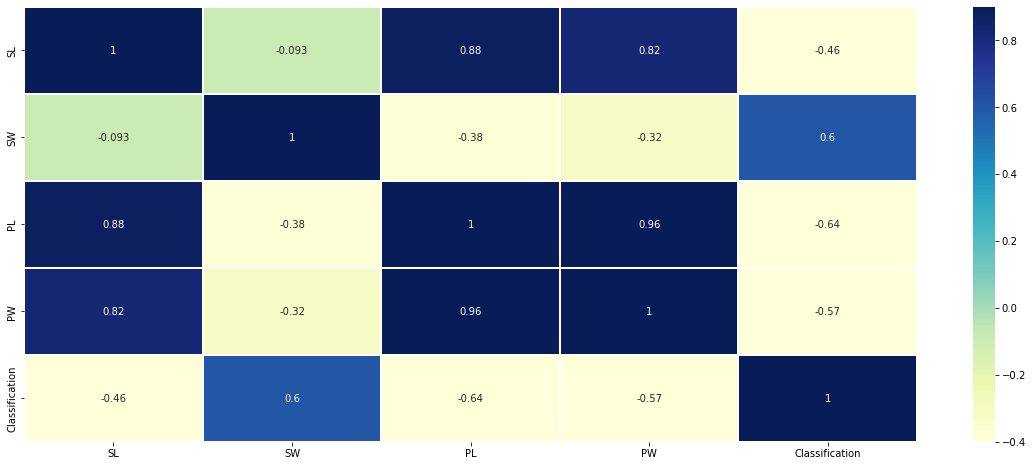

In [45]:
corrmatrix = data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix, vmin=-0.4, vmax=0.9, annot=True, linewidths=0.2, cmap='YlGnBu')

In [46]:
x_train, x_test, y_train, y_test =train_test_split(x ,y, random_state=42, test_size=0.2)
lr = linear_model.LinearRegression()
model = lr.fit(x_train, y_train)
predictions = model.predict(x_test)
print('MSE is: ',mean_squared_error(y_test,predictions))
print('R squared value is: ',r2_score(y_test, predictions))

MSE is:  0.2649186540959561
R squared value is:  0.6209431022474395


# 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

In [47]:
data.Classification.nunique()

3

In [48]:
data = pd.get_dummies(data)

In [49]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,2
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


In [50]:
data['Classification'].value_counts()

0    50
1    50
2    47
Name: Classification, dtype: int64

# Logistic Regression

In [51]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [52]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [62]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
accuracy is 1.0


C:\Users\hisham\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# KNN

In [66]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
accuracy is 1.0


# SVM

In [72]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
accuracy is 1.0


# decision tree

In [79]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.90      1.00      0.95         9
           2       1.00      1.00      1.00        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

[[ 9  1  0]
 [ 0  9  0]
 [ 0  0 11]]
accuracy is 0.9666666666666667


# Random forest algorithm

In [85]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
accuracy is 1.0
